In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import rasterio

%load_ext autoreload
%autoreload 2
pd.options.mode.chained_assignment = None

In [2]:
## Kluge for now (shouldn't use sys append)
import sys
sys.path.append("/Users/dporter/Documents/Research/Projects/nasa_combined")

from nasa_combined.config import data_dir, data_path, cIce, cAir 

from nasa_combined.custom_funcs import *  # read_DICE_matfile, print_raster

print(data_path)

/Users/dporter/data/Antarctic/ROSETTA/radar


# Read in airborne data

In [3]:
suffix = '.csv'
datafile = 'rosetta_combined'

infile = os.path.join(data_path, 'for_COMBINED', datafile + suffix)
print(infile)

/Users/dporter/data/Antarctic/ROSETTA/radar/for_COMBINED/rosetta_combined.csv


## read in using Pandas and set `unixtime` as index

In [4]:
from nasa_combined.custom_funcs import read_ROSETTA_csv

df = read_ROSETTA_csv(infile)
df.columns

Index(['Line', 'X_EPSG_3031', 'Y_EPSG_3031', 'unixtime', 'thickness_dice',
       'rosetta_lidar', 'rosetta_lidar_wrtgeo', 'rosetta_lidar_thickness',
       'diff_diceltthick_rsaltthick', 'dice_thick_bedmapthick',
       'icebase_dice'],
      dtype='object')

# Convert dataframe to xarray dataset

In [5]:
# df.describe()
df.head()

,Line,X_EPSG_3031,Y_EPSG_3031,unixtime,thickness_dice,rosetta_lidar,rosetta_lidar_wrtgeo,rosetta_lidar_thickness,diff_diceltthick_rsaltthick,dice_thick_bedmapthick,icebase_dice
unixtime,,,,,,,,,,,
2016-12-02 23:52:13,L20,-178255.739629,-460417.119902,1.480723e+09,NaN,166.500472,203.484556,1851.169232,NaN,NaN,NaN
2016-12-02 23:52:14,L20,-178346.076341,-460417.397744,1.480723e+09,NaN,166.328215,203.316570,1849.641012,NaN,NaN,NaN
2016-12-02 23:52:15,L20,-178436.480663,-460417.972846,1.480723e+09,NaN,166.155938,203.148576,1848.112705,NaN,NaN,NaN
2016-12-02 23:52:16,L20,-178526.896118,-460418.579014,1.480723e+09,NaN,165.983822,202.980743,1846.585878,NaN,NaN,NaN
2016-12-02 23:52:17,L20,-178617.232081,-460419.255438,1.480723e+09,NaN,165.812069,202.813272,1845.062336,NaN,NaN,NaN


In [26]:
df_temp = df[['X_EPSG_3031', 'Y_EPSG_3031', 'thickness_dice']][::10000]

In [27]:
# ds = data_long.drop('cellref', axis=1).rename(columns={'Year': 'year'}).set_index(['year', 'lat', 'lon']).to_xarray()

ds = df_temp.set_index(['X_EPSG_3031', 'Y_EPSG_3031']).to_xarray()

# df_rows = pd.DataFrame(data).set_index(["lon", "lat"])
# ds = xr.Dataset.from_dataframe(df_rows)

In [28]:
ds

<xarray.Dataset>
Dimensions:         (X_EPSG_3031: 65, Y_EPSG_3031: 65)
Coordinates:
  * X_EPSG_3031     (X_EPSG_3031) float64 -5.31e+05 -5.282e+05 ... 3.591e+05
  * Y_EPSG_3031     (Y_EPSG_3031) float64 -1.341e+06 -1.317e+06 ... -4.604e+05
Data variables:
    thickness_dice  (X_EPSG_3031, Y_EPSG_3031) float64 nan nan nan ... nan nan

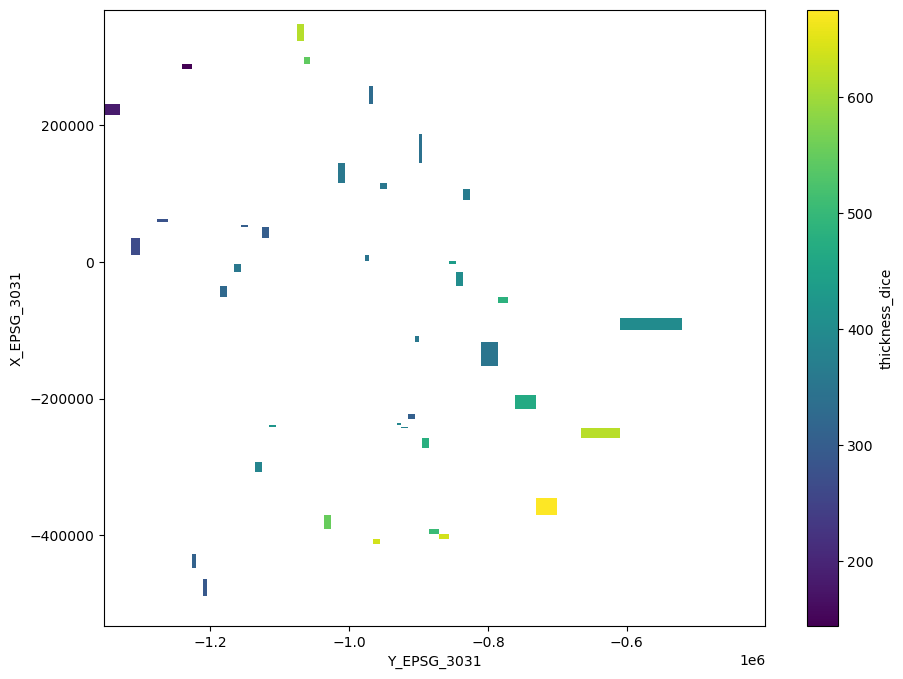

In [29]:
ds.thickness_dice.plot(size = 8);

## Try `verde`?

https://www.fatiando.org/verde/latest/gallery/scipygridder.html#sphx-glr-gallery-scipygridder-py

# Appendix